In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#import plotly.graph_objs as go


kill= pd.read_csv("F:\Les\Data analytic\Project\Data/PoliceKillingsUS.csv", encoding='latin-1')
kill['age'].fillna((kill['age'].mean()), inplace=True)
kill['armed'].fillna('gun',inplace=True)
kill.dropna(subset=['race'],how='all', inplace = True)
kill.drop('flee',axis=1,inplace=True)
kill['name'].replace(['TK TK'],'Unknown',inplace = True)
kill_miss_values = kill.isnull().sum()
kill_miss_values[kill_miss_values >0 ]

Series([], dtype: int64)

In [91]:
pwd

'C:\\Users\\layegh'

In [2]:
poverty_level = pd.read_csv("F:\Les\Data analytic\Project\Data/PercentagePeopleBelowPovertyLevel.csv",encoding='latin-1')
poverty_level_miss_values = poverty_level.isnull().sum()
poverty_level['poverty_rate'].replace(['-'],0.0,inplace = True)
poverty_level.poverty_rate.value_counts()

0       1464
0.0      201
6.7      129
7.4      129
10       128
10.9     128
6.3      126
4.4      126
11.5     125
8.3      125
7.9      123
8.6      122
5.9      122
10.2     122
11.1     122
8.7      122
8.8      121
12.8     121
14.3     121
8.5      120
13.5     120
9.1      120
11.2     118
15.4     118
10.8     118
16       118
9.3      118
11.3     117
7.6      117
7.5      117
        ... 
71.6       1
67.1       1
68.9       1
74.8       1
98.6       1
86.6       1
58.2       1
68.5       1
86.7       1
73.8       1
71.7       1
80.6       1
93.5       1
77.8       1
93.3       1
61.5       1
92.9       1
87.8       1
59.9       1
73         1
62.3       1
74.6       1
84.7       1
51.3       1
74.3       1
78         1
92.3       1
56.5       1
84.3       1
77         1
Name: poverty_rate, Length: 771, dtype: int64

Text(0.5, 1.0, 'Poverty Rate of Each State')

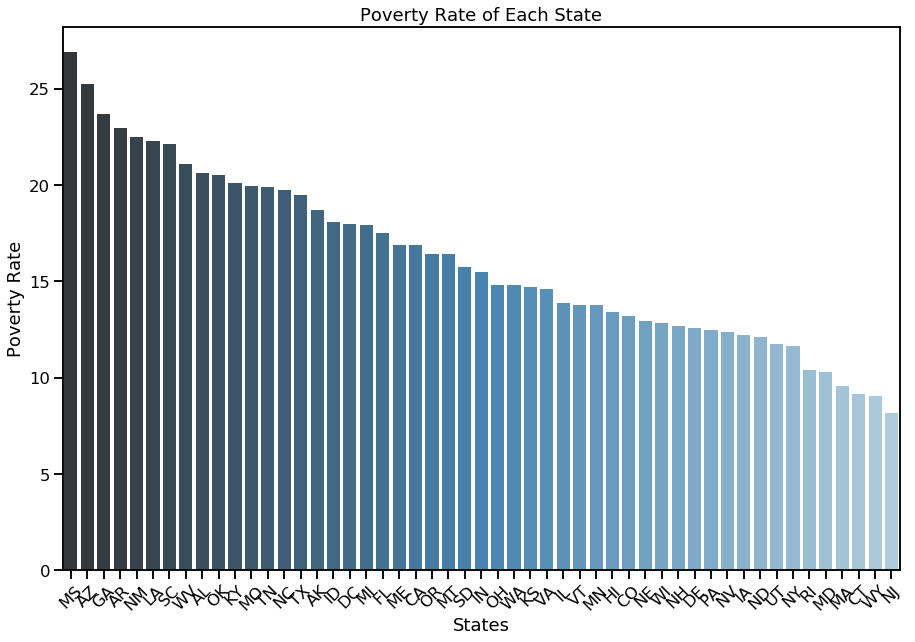

In [38]:
#show the poverty rate of States #
poverty_level.poverty_rate = poverty_level.poverty_rate.astype(float)
Area_list = list(poverty_level['Geographic Area'].unique())
poverty_ratio=[]
for i in Area_list:
    x=poverty_level[poverty_level['Geographic Area']== i]
    area_poverty_rate= sum(x.poverty_rate)/len(x)
    poverty_ratio.append(area_poverty_rate)
data_poverty_ratio = pd.DataFrame({'area_list': Area_list , 'poverty_rate':poverty_ratio})
poverty_ratio_index=(data_poverty_ratio['poverty_rate'].sort_values(ascending=False)).index.values
sorted_poverty_ratio = data_poverty_ratio.reindex(poverty_ratio_index)
plt.figure(figsize=(15,10))
sns.barplot(x= sorted_poverty_ratio['area_list'], y= sorted_poverty_ratio['poverty_rate'] , palette = 'Blues_d' )
#sns.set_context('talk')
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate of Each State')

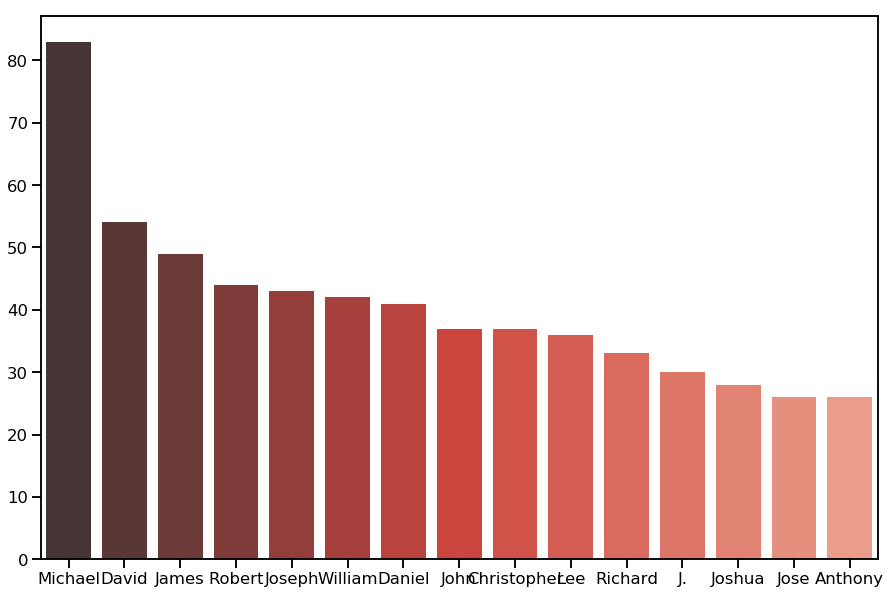

In [52]:
#Show the Most Common Names
seperated_names = kill.name[kill.name != "Unknown"].str.split() #seperate the names : "Tim Elliot" --> "Tim" "Elliot"
a,b = zip(*seperated_names) # put the firstnames in a and surnames in b
name_list = a+b
name_count= Counter(name_list) #getting number of each name
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x=list(x) #most common names
y=list(y) # number of repete 

plt.figure(figsize=(15,10))
shape=sns.barplot(x=x , y=y , palette = 'Reds_d')
plt.xlabel=("Name")
plt.ylabel=("Number of Names")
plt.title=("Most Common Names")


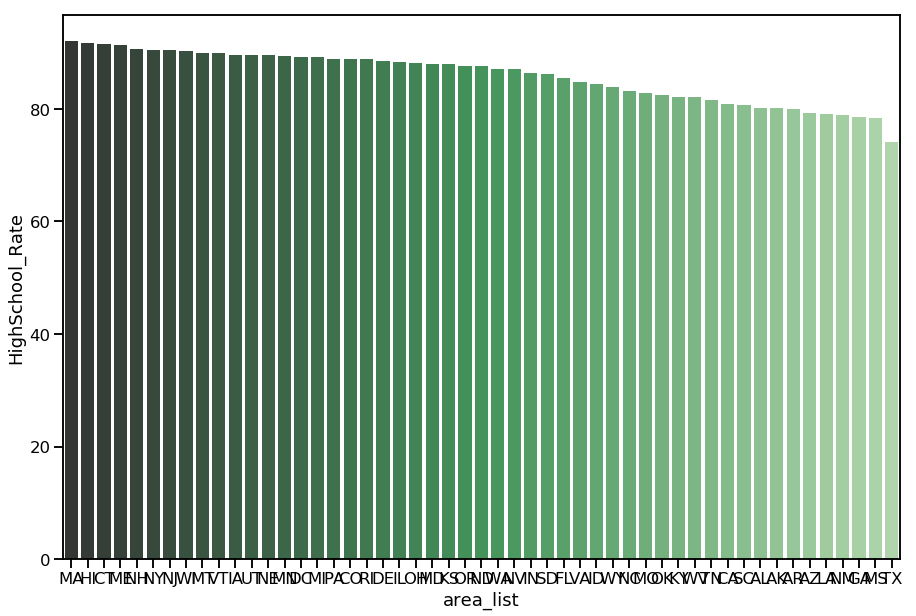

In [70]:
#show the percentage of highschool graduation for each state
percentage_complete_highschool = pd.read_csv("F:\Les\Data analytic\Project\Data/PercentOver25CompletedHighSchool.csv",encoding='latin-1')
percentage_complete_highschool_miss_values = percentage_complete_highschool.isnull().sum()
percentage_complete_highschool.percent_completed_hs.replace(['-'],0.0,inplace=True)
percentage_complete_highschool.percent_completed_hs = percentage_complete_highschool.percent_completed_hs.astype(float)

#percentage_complete_highschool['percent_completed_hs']=pd.to_numeric(percentage_complete_highschool['percent_completed_hs'],errors='coerce')
#percentage_complete_highschool_miss_values[percentage_complete_highschool_miss_values > 0]
#percentage_complete_highschool.head(10)
#percentage_complete_highschool.percent_completed_hs.mean()
#percentage_complete_highschool.percent_completed_hs.replace('-',percentage_complete_highschool['percent_completed_hs'].mean(),inplace=True)
highschool_ratio=[]
for i in Area_list:
    x = percentage_complete_highschool[percentage_complete_highschool['Geographic Area']==i]
    complete_rate = sum(x.percent_completed_hs)/len(x)
    highschool_ratio.append(complete_rate)
HS_Ratio = pd.DataFrame({'area_list': Area_list , 'HighSchool_Rate': highschool_ratio})
HS_Ratio_index = (HS_Ratio['HighSchool_Rate'].sort_values(ascending = False )).index.values
sorted_HS_Ratio = HS_Ratio.reindex(HS_Ratio_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_HS_Ratio['area_list'], y= sorted_HS_Ratio['HighSchool_Rate'], palette='Greens_d')
plt.xlabel=("States")
plt.ylabel = ("High School Graduate Rate ")
plt.title = ("Percentage of High School Graduation")
plt.show()

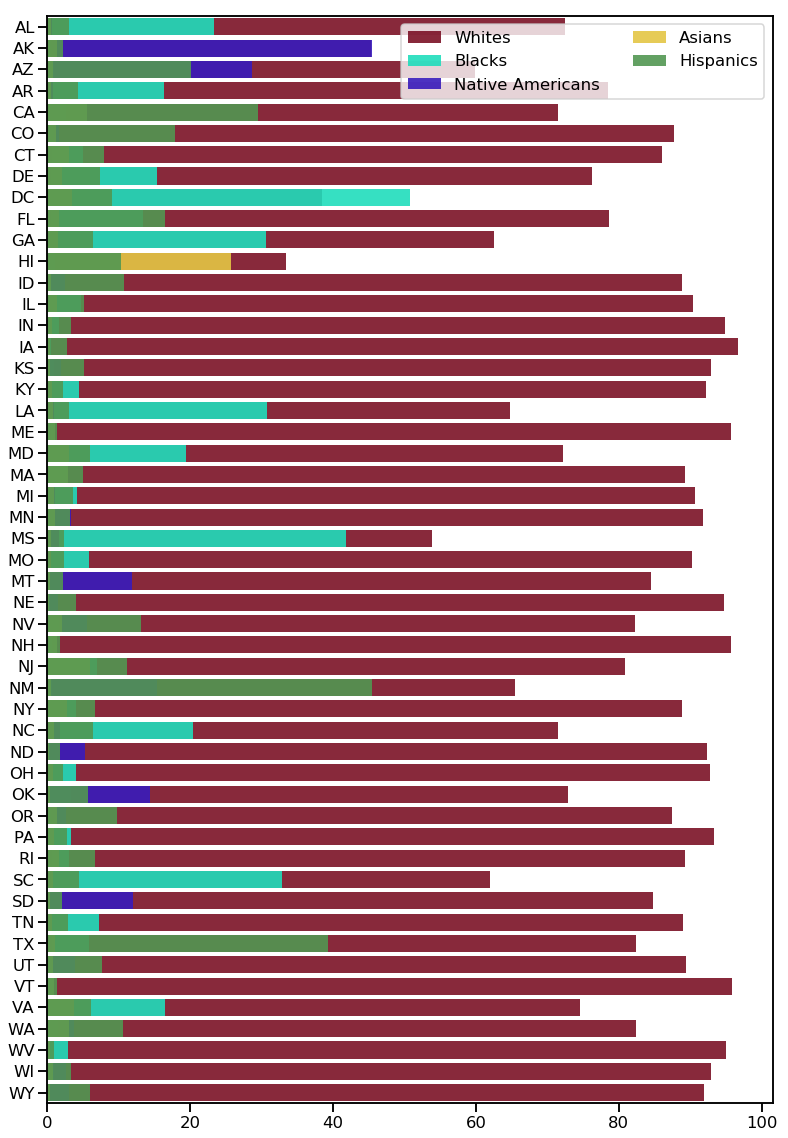

In [81]:
Race_by_city = pd.read_csv("F:\Les\Data analytic\Project\Data/ShareRaceByCity.csv",encoding='latin-1')
Race_by_city_miss_values = Race_by_city.isnull().sum()
Race_by_city.replace(["-"],0.0,inplace = True)
Race_by_city.replace(["(X)"],0.0,inplace = True)
Race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = Race_by_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

#Race_by_city_miss_values [ Race_by_city_miss_values >0 ]
#Race_by_city.head(10)

#see the percentage of each races by states
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]

for i in Area_list:
    x=Race_by_city[Race_by_city["Geographic area"]==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
f,ax=plt.subplots(figsize=(13,20))
sns.barplot(x=share_white,y=Area_list,color="#8c001a", alpha=0.9,label="Whites")
sns.barplot(x=share_black,y=Area_list, color= "#00fdd1", alpha=0.9, label="Blacks")
sns.barplot(x=share_native_american,y=Area_list, color= "#2701d5", alpha=0.9, label="Native Americans")
sns.barplot(x=share_asian,y=Area_list, color="#ffd62a", alpha=0.9, label="Asians")
sns.barplot(x=share_hispanic,y=Area_list, color="#46a346", alpha=0.9, label="Hispanics")

ax.legend(ncol=2,loc="upper right",frameon=True)

C:\Users\layegh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\layegh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\layegh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


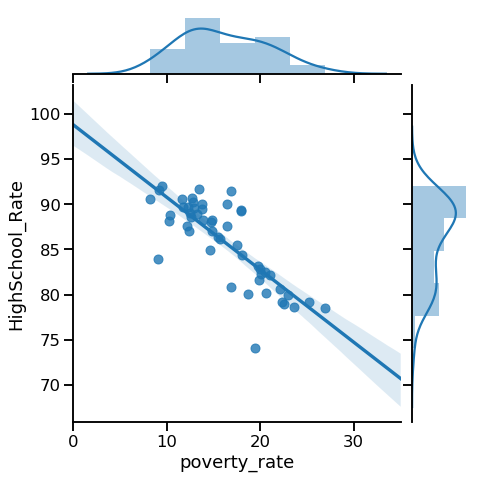

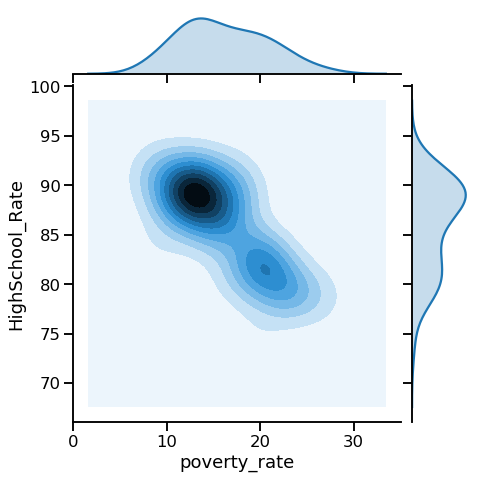

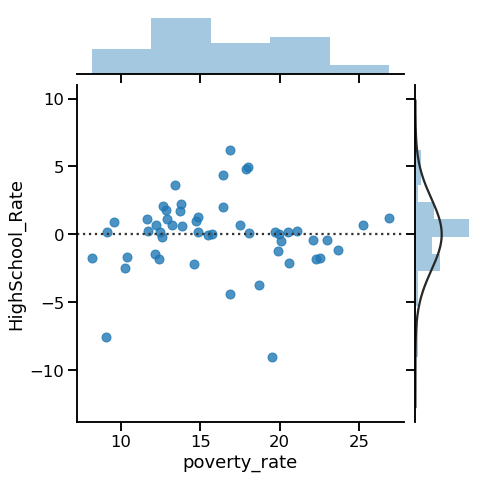

In [90]:
#Joint Plot
data=pd.concat([sorted_poverty_ratio,sorted_HS_Ratio["HighSchool_Rate"]],axis=1)
#data
g = sns.jointplot(data.poverty_rate, data.HighSchool_Rate, kind="reg", size=7)
g = sns.jointplot(data.poverty_rate, data.HighSchool_Rate, kind="kde", size=7)
g = sns.jointplot(data.poverty_rate, data.HighSchool_Rate, kind="resid", size=7)
#sorted_HS_Ratio